In [1]:
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
Lambda = splot.apStarWavegrid()
import csv
import sys

In [2]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

In [3]:
def Equiv_Width(loc_id,twomass_id):
    
    #given a certain spec
    spec_header = apread.apStar(loc_id,twomass_id,ext=0,header=True)
    nvisits = spec_header[1]['NVISITS']
    EqW_array = []
    
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)

    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./121.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    
    for i in range(nvisits):
        spec = apread.apStar(loc_id,twomass_id,ext=1,header=False)[2 + i]
    
    
        centerline = find_nearest(Lambda,calculated_point2)
        L1 = centerline - 90
        L2 = centerline - 45
        R1 = centerline + 45
        R2 = centerline + 90
        #generic continuum lines 35 elements wide 
        lsum= np.sum(spec[L1:L2])/ len(spec[L1:L2])
        rsum = np.sum(spec[R1:R2])/len(spec[R1:R2])
        Fc= (lsum+rsum)/2
    
        EqW=0
        
        for i in range(L2,R1):
            summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec[i+1]+spec[i]))
            EqW = EqW + summ
        EqW = abs(EqW/Fc)
        EqW_array.append(EqW)
        

    STD = np.std(EqW_array)
    
    EqW_M = np.median(EqW_array)
    return twomass_id,loc_id,EqW_M,STD
    #print np.sort(EqW_array)
    #print 'The Equivalent Width is',EqW_M,'.'
    #print 'The Standard Deviation is',STD,'.'

In [4]:
def EqW_Function(filename,savefile):
    
    #INPUT
    x=[]
    exampleFile = open(filename)
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    for row in exampleData:
        x.append(Equiv_Width(row[2],row[1]))
    
    #OUTPUT
    f = open(savefile, 'wb')
    try:
        writer = csv.writer(f,delimiter=',',lineterminator='\n\n')
        writer.writerow( ('#','2Mass-ID', 'Field', 'EqW','StD') )
        for i in range(len(x)):
            writer.writerow( (i,x[i][0], x[i][1],round(x[i][2],4),round(x[i][3],4)) )
    finally:
        f.close()

    print open(savefile, 'rt').read()

In [5]:
#EqW_Function('FST CSV FILE.csv','FST TEST3.csv')

In [6]:
def EqW_Plot():
    spec = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
    nvisits = spec[1]['NVISITS']
    print range(nvisits)
    print spec[1]['NVISITS']

In [7]:
spec00 = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)

In [8]:
#print spec00[1]

(500, 1250)

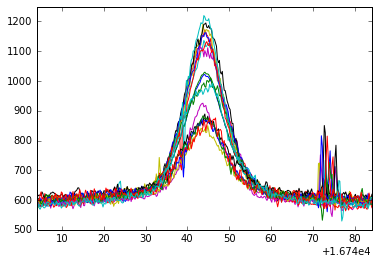

In [9]:
plt.plot(Lambda,spec00[0]) #pixel-based combined spectra
plt.plot(Lambda,spec00[1]) #global-weight combined spectra
plt.plot(Lambda,spec00[2]) #visit 1
plt.plot(Lambda,spec00[3])
plt.plot(Lambda,spec00[4])
plt.plot(Lambda,spec00[5])
plt.plot(Lambda,spec00[6])
plt.plot(Lambda,spec00[7])
plt.plot(Lambda,spec00[8])
plt.plot(Lambda,spec00[9])
plt.plot(Lambda,spec00[10])
plt.plot(Lambda,spec00[11])
plt.plot(Lambda,spec00[12])
plt.plot(Lambda,spec00[13])
plt.plot(Lambda,spec00[14])
plt.plot(Lambda,spec00[15])
plt.plot(Lambda,spec00[16])
plt.plot(Lambda,spec00[17]) #visit 16
plt.xlim([16744,16824])
plt.ylim([500,1250])

In [10]:
def Average_Spectra(loc_id,twomass_id):
    
    #bring in the .fits file to read how many visits there are
    spec_header = apread.apStar(loc_id,twomass_id,ext=0,header=True)
    nvisits = spec_header[1]['NVISITS']
        
    #append all the visit data within target window to an array
    avg = np.zeros(shape=(345,))
    Lwindow = find_nearest(Lambda,16744)
    Rwindow = find_nearest(Lambda,16824)
    
    for i in range(nvisits):
       
        input_spectra = apread.apStar(loc_id,twomass_id,ext=1,header=False)[2 + i]
        avg += input_spectra[Lwindow:Rwindow]
   
    #Plot  
    plt.plot(Lambda[Lwindow:Rwindow],avg/16)
    plt.xlim(16744,16824)

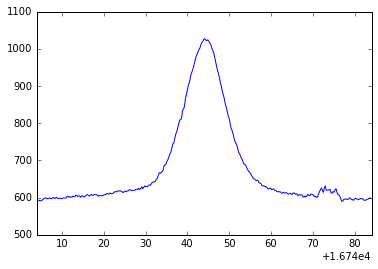

In [11]:
Average_Spectra(4586,'2M03434449+3143092')

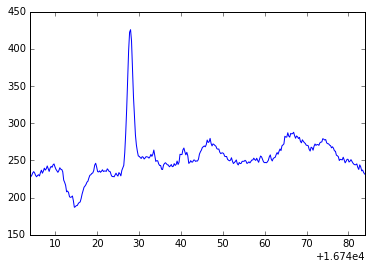

In [12]:
Average_Spectra(4587,'2M03250943+3046215')

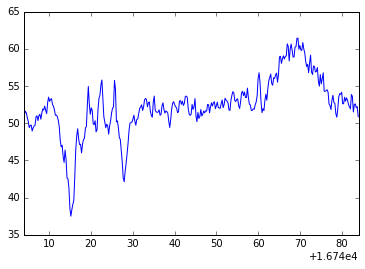

In [13]:
Average_Spectra(4572,'2M06404837+0948385')

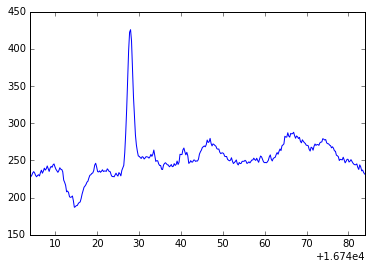

In [14]:
Average_Spectra(4587,'2M03250943+3046215')

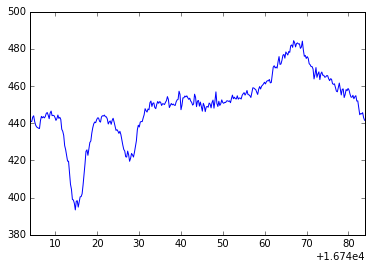

In [15]:
Average_Spectra(4587,'2M03292187+3115363')

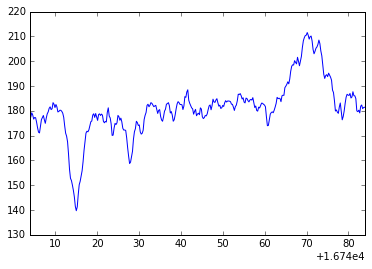

In [16]:
Average_Spectra(4587,'2M03295403+3120529')

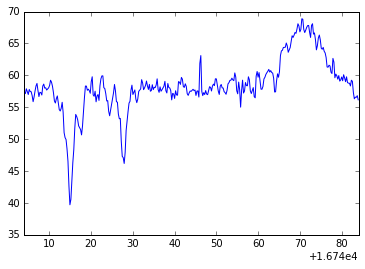

In [17]:
Average_Spectra(4572,'2M06413876+0932117')

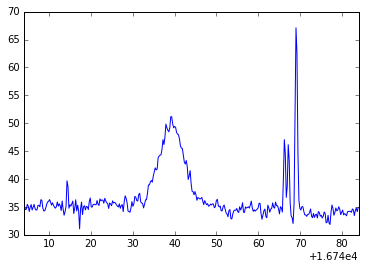

In [18]:
Average_Spectra(4572,'2M06410890+0929451')

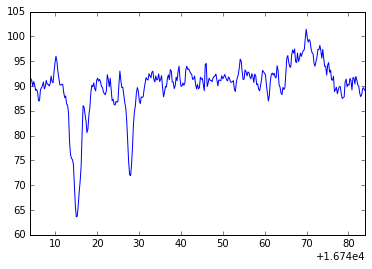

In [19]:
Average_Spectra(4572,'2M06410715+0927294')

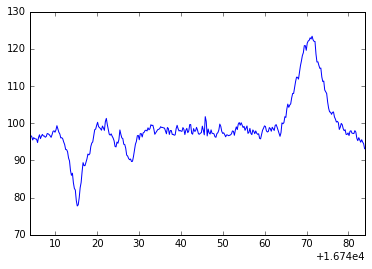

In [20]:
Average_Spectra(4572,'2M06405926+0933250')

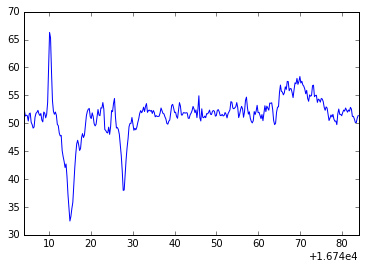

In [21]:
Average_Spectra(4572,'2M06405426+0949203')

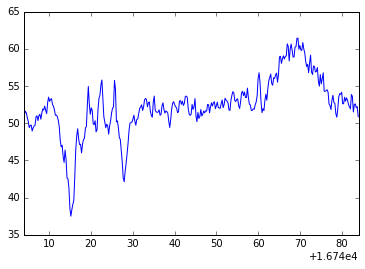

In [22]:
Average_Spectra(4572,'2M06404837+0948385')

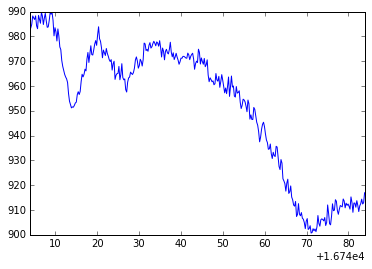

In [23]:
Average_Spectra(4162,'2M08541894+1239291')

#plt.ylim(900,1200)